In [1]:
using ProgressMeter
using Printf
using BSON: @save, @load
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
include("escape_dimer_one_hit.jl")
H=.25

0.25

In [2]:
t_end = 1e3
width = 2.25; height = 4.5
n_iter_P = 200;n_iter_Q =200;
N = n_iter_P * n_iter_Q;
ArrQ = range(-width, stop = width, length = n_iter_P)
ArrP = range(0, stop = height, length = n_iter_Q)
mesh = [(Q, P) for Q in ArrQ, P in ArrP]
mesh_list = reshape(mesh, 1, :)
t_list = t_end * ones(N);
Energy = H* ones(N);

h = replace(@sprintf("%.13f",H), "." => "_")
nQ = @sprintf("_%d",n_iter_Q)
nP = @sprintf("_%d",n_iter_P)
h_BSON="num_hhits_escape_data"*h*nQ*nP*".bson"
location = "/mnt/bdd38f66-9ece-451a-b915-952523c139d2/Escape/"
println(h_BSON)
one_hit_exit=[]

num_hhits_escape_data0_2500000000000_200_200.bson


0-element Array{Any,1}

In [3]:
exit_points= @showprogress map(escape_after_one_hit, mesh_list, t_list, Energy);

Progress: 100%|█████████████████████████████████████████| Time: 0:12:1939m


In [4]:
cleaned_points=[]
for item in exit_points
    if item!=nothing
        push!(cleaned_points, item)
    end
end
cleaned_points

3461-element Array{Any,1}:
 (0, -1.1871859296482412, 0.5964949542281096, 0.0)             
 (0, -1.164572864321608, 0.5870875365366317, 0.0)              
 (0, -1.1419597989949748, 0.5781394289110859, 0.0)             
 (0, -1.1193467336683418, 0.5696437188301299, 0.0)             
 (0, -1.0967336683417086, 0.5615946595599092, 0.0)             
 (0, -1.0741206030150754, 0.553987639601864, 0.0)              
 (0, -1.0515075376884422, 0.546819163298087, 0.0)              
 (0, -1.028894472361809, 0.5400868419928162, 0.0)              
 (0, -1.006281407035176, 0.5337893953551529, 0.0)              
 (0, -0.9836683417085427, 0.5279266626539846, 0.0)             
 (0, -0.9610552763819096, 0.5224996239476887, 0.0)             
 (0, -0.9384422110552764, 0.5175104313138456, 0.0)             
 (0, -0.9158291457286433, 0.5129624504025884, 0.0)             
 ⋮                                                             
 (0, 1.435929648241206, 3.111757561639632, 4.025125628140704)  
 (0, 1.435929

In [5]:
# one_hit_exit=[]
# for i = 1:N
#     Q, P = mesh_list[i]
#     if num_until_exit[i] == 1
#         push!(one_hit_exit,[Q,P])
#     end
# end
# one_hit_exit          

In [6]:
function add_eight!(point,radius, one_hit_exit, t_end, energy)
    X=point[2]
    Y=point[4]
    
    X_plus=X+radius
    Y_plus=Y+radius
    X_minus=X-radius
    Y_minus=Y-radius
    
    
    point_1=[X_minus, Y_plus]
    point_2=[X, Y_plus]
    point_3=[X_minus, Y_plus]
    
    point_4=[X_minus, Y]
    point_5=[X_plus, Y]
    
    point_6=[X_minus, Y_minus]
    point_7=[X, Y_minus]
    point_8=[X_minus, Y_minus];
    
    
    new_points= [point_1, point_2, point_3, point_4, point_5, point_6, point_7, point_8]
    for point in new_points
        new_point=escape_after_one_hit(point,t_end,energy)
        if new_point!=nothing
            push!(one_hit_exit, new_point)
        end
    end
end

add_eight! (generic function with 1 method)

In [7]:
function add_four!(point,radius, one_hit_exit, t_end, energy)
    X=point[2]
    Y=point[4]
    
    X_plus=X+radius
    Y_plus=Y+radius
    X_minus=X-radius
    Y_minus=Y-radius
    
    
    point_2=[X, Y_plus]
    
    point_4=[X_minus, Y]
    
    point_5=[X_plus, Y]
    
    point_7=[X, Y_minus]
    
    
    new_points= [point_2, point_4, point_5, point_7]
      for point in new_points
        new_point=escape_after_one_hit(point,t_end,energy)
        if new_point!=nothing
            push!(one_hit_exit, new_point)
        end
    end
end

add_four! (generic function with 1 method)

In [8]:
function addpoint!(list)
    push!(list,[-10,10])
end

addpoint! (generic function with 1 method)

In [9]:
function unzipper2(array_of_points)
    N=length(array_of_points)
    Q=zeros(N)
    P=zeros(N)
    for (index,point) in enumerate(array_of_points)
        Q[index]=point[2]
        P[index]=point[4]
    end
    return Q,P
end

unzipper2 (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:09:37


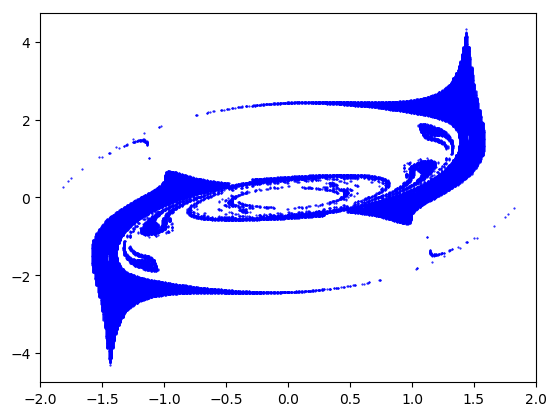

In [10]:
old_list=copy(cleaned_points)
energy=.25
radius=.01

@showprogress for (index,point) in enumerate(old_list)
    add_eight!(point,radius, cleaned_points, t_end, energy)
end
cleaned_points
length(cleaned_points)
Q,P=unzipper2(cleaned_points)
Q_one=vcat(Q,-Q); P_one=vcat(P,-P);
plot(Q_one,P_one, ".",markersize=1,c=:blue);

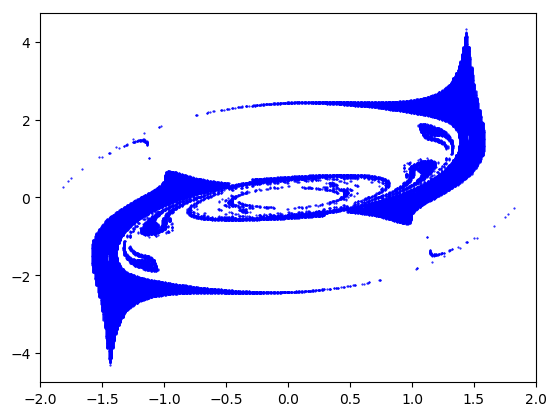

In [11]:
Q,P=unzipper2(cleaned_points)
Q_one=vcat(Q,-Q); P_one=vcat(P,-P);
plot(Q_one,P_one, ".",markersize=1,c=:blue);

In [12]:
cleaned_points

28095-element Array{Any,1}:
 (0, -1.1871859296482412, 0.5964949542281096, 0.0)             
 (0, -1.164572864321608, 0.5870875365366317, 0.0)              
 (0, -1.1419597989949748, 0.5781394289110859, 0.0)             
 (0, -1.1193467336683418, 0.5696437188301299, 0.0)             
 (0, -1.0967336683417086, 0.5615946595599092, 0.0)             
 (0, -1.0741206030150754, 0.553987639601864, 0.0)              
 (0, -1.0515075376884422, 0.546819163298087, 0.0)              
 (0, -1.028894472361809, 0.5400868419928162, 0.0)              
 (0, -1.006281407035176, 0.5337893953551529, 0.0)              
 (0, -0.9836683417085427, 0.5279266626539846, 0.0)             
 (0, -0.9610552763819096, 0.5224996239476887, 0.0)             
 (0, -0.9384422110552764, 0.5175104313138456, 0.0)             
 (0, -0.9158291457286433, 0.5129624504025884, 0.0)             
 ⋮                                                             
 (0, 1.435929648241206, 3.225802318752766, 4.12819095477387)   
 (0, 1.42592

In [13]:
SAVE_DATA=Dict("one_hit_exit"=>one_hit_exit)


Dict{String,Array{Any,1}} with 1 entry:
  "one_hit_exit" => Any[]

In [14]:
include("forward_one.jl")

forward_one (generic function with 1 method)

In [15]:
cleaned_points

28095-element Array{Any,1}:
 (0, -1.1871859296482412, 0.5964949542281096, 0.0)             
 (0, -1.164572864321608, 0.5870875365366317, 0.0)              
 (0, -1.1419597989949748, 0.5781394289110859, 0.0)             
 (0, -1.1193467336683418, 0.5696437188301299, 0.0)             
 (0, -1.0967336683417086, 0.5615946595599092, 0.0)             
 (0, -1.0741206030150754, 0.553987639601864, 0.0)              
 (0, -1.0515075376884422, 0.546819163298087, 0.0)              
 (0, -1.028894472361809, 0.5400868419928162, 0.0)              
 (0, -1.006281407035176, 0.5337893953551529, 0.0)              
 (0, -0.9836683417085427, 0.5279266626539846, 0.0)             
 (0, -0.9610552763819096, 0.5224996239476887, 0.0)             
 (0, -0.9384422110552764, 0.5175104313138456, 0.0)             
 (0, -0.9158291457286433, 0.5129624504025884, 0.0)             
 ⋮                                                             
 (0, 1.435929648241206, 3.225802318752766, 4.12819095477387)   
 (0, 1.42592

In [16]:
q1, q2, p1, p2=forward_one(one_hit_exit[2], t_end, H)

BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [2]

In [17]:
new_forward=[]

@showprogress for point in cleaned_points
    forward_point=forward_one(point, t_end, H)
    if forward_point!=nothing
        push!(new_forward,forward_point)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:15:30m22m


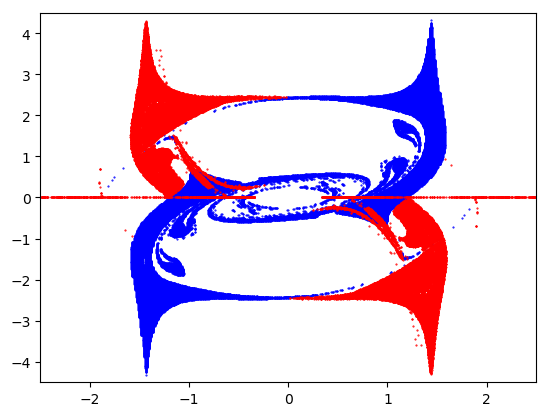

(-4.5, 4.5)

In [18]:
Q,P=unzipper2(new_forward)
Q_escape=vcat(Q,-Q); P_escape=vcat(P,-P);
Q,P=unzipper2(cleaned_points)
Q_one=vcat(Q,-Q); P_one=vcat(P,-P);
plot(Q_one,P_one, ".",markersize=1,c=:blue);
plot(Q_escape,P_escape, ".",markersize=1,c=:red);
xlim(-2.5,2.5) 
ylim(-4.5,4.5) 

In [19]:
new_new_forward=[]

@showprogress for point in new_forward
    forward_point=forward_one(point, t_end, H)
    if forward_point!=nothing
        push!(new_new_forward,forward_point)
    end
end

Progress:   0%|                                         |  ETA: 0:12:34

ErrorException: Event repeated at the same time. Please report this error

In [20]:
new_forward

28061-element Array{Any,1}:
 (-3.8143058484005405, 4.5185163893229445, -2.2826826853549225, -2.429263048764971e-16) 
 (2.3368233572938147e-17, -0.6891055559653417, 0.4567970725934264, 2.3128273532210684)  
 (4.181311893885703e-16, -0.8642997547997545, 0.5267777103945991, 2.235192658974052)    
 (9.942438280579616e-17, -0.9803232470780509, 0.5869992504476577, 2.1709511602678484)   
 (1.0570561127281182e-15, -1.065465112252823, 0.6388827955767812, 2.1148773452024283)   
 (-1.7803891718125597e-16, -1.1316180881811992, 0.6829066143391054, 2.0626477856681373) 
 (2.0015417379698353e-17, -1.1848564847047527, 0.7189889317928682, 2.010627927376374)   
 (1.9794952799479585e-16, -1.2286572249041563, 0.7466801561341363, 1.955484799117843)   
 (-8.800834893133049e-17, -1.2651303230176467, 0.7652796417368114, 1.8939027797365449)  
 (3.819256953479494e-18, -1.295533373379233, 0.7739420895832297, 1.8223647447673084)    
 (1.0544920952182089e-16, -1.3204499635997597, 0.7718189248847773, 1.7369596806892

In [21]:
cleaned_points

28095-element Array{Any,1}:
 (0, -1.1871859296482412, 0.5964949542281096, 0.0)             
 (0, -1.164572864321608, 0.5870875365366317, 0.0)              
 (0, -1.1419597989949748, 0.5781394289110859, 0.0)             
 (0, -1.1193467336683418, 0.5696437188301299, 0.0)             
 (0, -1.0967336683417086, 0.5615946595599092, 0.0)             
 (0, -1.0741206030150754, 0.553987639601864, 0.0)              
 (0, -1.0515075376884422, 0.546819163298087, 0.0)              
 (0, -1.028894472361809, 0.5400868419928162, 0.0)              
 (0, -1.006281407035176, 0.5337893953551529, 0.0)              
 (0, -0.9836683417085427, 0.5279266626539846, 0.0)             
 (0, -0.9610552763819096, 0.5224996239476887, 0.0)             
 (0, -0.9384422110552764, 0.5175104313138456, 0.0)             
 (0, -0.9158291457286433, 0.5129624504025884, 0.0)             
 ⋮                                                             
 (0, 1.435929648241206, 3.225802318752766, 4.12819095477387)   
 (0, 1.42592

In [22]:
sign(-3)

-1

In [23]:
include("negative_time.jl")


negative_time (generic function with 1 method)